# Logs processing

Traitements de logs générés par un QCM.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Observations brutes

In [3]:
import os
names = [os.path.join("logs", _) for _ in os.listdir("logs")]
names

['logs\\QCMApp.log']

In [4]:
with open(names[0], 'r', encoding="utf-8") as f:
    lines = f.readlines()
lines[5:10]

['2018-12-12 17:56:29,989,INFO,[DATA],{"msg":"qcm","session":{"alias":"xavierd"},"client":["167.220.197.38",6274],"game":"simple_french_qcm","qn":"0"}\n',
 '2018-12-12 17:56:33,130,INFO,[DATA],{"msg":"event","session":{"alias":"xavierd"},"client":["167.220.197.38",6274],"events":["focus:true,game:simple_french_qcm,qn:0"]}\n',
 '2018-12-12 17:56:34,145,INFO,[DATA],{"msg":"event","session":{"alias":"xavierd"},"client":["167.220.197.38",6274],"events":["focus:true,game:simple_french_qcm,qn:0"]}\n',
 '2018-12-12 17:56:34,224,INFO,[DATA],{"msg":"event","session":{"alias":"xavierd"},"client":["167.220.196.38",52686],"events":["focus:true,game:simple_french_qcm,qn:0"]}\n',
 '2018-12-12 17:56:34,255,INFO,[DATA],{"msg":"answer","session":{"alias":"xavierd"},"client":["167.220.197.38",6274],"data":{"a0":"on","b":"ok","game":"simple_french_qcm","qn":"0","next":"1","events":"-a0,on"}}\n']

In [5]:
from mathenjeu.datalog import enumerate_qcmlog
obs = list(enumerate_qcmlog(names))
obs[:5]

[{'alias': 'xavierd',
  'time': datetime.datetime(2018, 12, 12, 17, 56, 29, 989000),
  'qtime': 'begin'},
 {'alias': 'xavierd',
  'time': datetime.datetime(2018, 12, 12, 17, 56, 34, 255000),
  'qtime': 'end',
  'simple_french_qcm-0-a0': 'on',
  'simple_french_qcm-0-b': 'ok',
  'game': 'simple_french_qcm',
  'qn': '0',
  'next': '1',
  'events': '-a0,on',
  'simple_french_qcm-0-nbvisit': 1.0,
  'simple_french_qcm-0-duration': datetime.timedelta(seconds=4, microseconds=266000)},
 {'alias': 'xavierd',
  'time': datetime.datetime(2018, 12, 12, 17, 56, 34, 302000),
  'qtime': 'begin'},
 {'alias': 'xavierd',
  'time': datetime.datetime(2018, 12, 12, 17, 56, 37, 645000),
  'qtime': 'end',
  'simple_french_qcm-1-a2': 'on',
  'simple_french_qcm-1-b': 'ok',
  'game': 'simple_french_qcm',
  'qn': '1',
  'next': '2',
  'events': '-a2,on',
  'simple_french_qcm-1-nbvisit': 1.0,
  'simple_french_qcm-1-duration': datetime.timedelta(seconds=3, microseconds=343000)},
 {'alias': 'xavierd',
  'time': date

In [6]:
import pandas
df = pandas.DataFrame(obs)
df.shape

(81, 57)

In [7]:
df.head().T

,0,1,2,3,4
-a1,NaN,NaN,NaN,NaN,NaN
alias,xavierd,xavierd,xavierd,xavierd,xavierd
events,NaN,"-a0,on",NaN,"-a2,on",NaN
game,NaN,simple_french_qcm,NaN,simple_french_qcm,NaN
next,NaN,1,NaN,2,NaN
on,NaN,NaN,NaN,NaN,NaN
on-a2,NaN,NaN,NaN,NaN,NaN
qn,NaN,0,NaN,1,NaN
qtime,begin,end,begin,end,begin
simple_french_qcm-0-a0,NaN,on,NaN,NaN,NaN


In [8]:
set(df.alias)

{'Clemence', 'thierry-d', 'xavierd', 'xavierg'}

## Préparation des données

In [9]:
df2 = df[df.qtime == 'end'].copy()
df2.head().T

,1,3,5,7,9
-a1,NaN,NaN,NaN,NaN,NaN
alias,xavierd,xavierd,xavierd,xavierd,xavierd
events,"-a0,on","-a2,on","-a2,on","-a2,on-a2,on-a3,on-a2,on","-a2,on"
game,simple_french_qcm,simple_french_qcm,simple_french_qcm,simple_french_qcm,simple_french_qcm
next,1,2,3,4,5
on,NaN,NaN,NaN,NaN,NaN
on-a2,NaN,NaN,NaN,NaN,NaN
qn,0,1,2,3,4
qtime,end,end,end,end,end
simple_french_qcm-0-a0,on,NaN,NaN,NaN,NaN


In [10]:
cols = ['alias'] + [c for c in df2.columns if "simple_french_qcm" in c and '-a' in c]
df_question = df2[cols]
cols = ['alias'] + [c for c in df2.columns if "simple_french_qcm" in c and '-b' in c]
df_bouton = df2[cols]
cols = ['alias'] + [c for c in df2.columns if "simple_french_qcm" in c and '-nb' in c]
df_visit = df2[cols]
cols = ['alias'] + [c for c in df2.columns if "simple_french_qcm" in c and '-ANS' in c]
df_ans = df2[cols]
cols = ['alias'] + [c for c in df2.columns if "simple_french_qcm" in c and '-dur' in c]
df_dur = df2[cols]

In [11]:
df_dur.head()

,alias,simple_french_qcm-0-duration,simple_french_qcm-1-duration,simple_french_qcm-2-duration,simple_french_qcm-3-duration,simple_french_qcm-4-duration,simple_french_qcm-5-duration,simple_french_qcm-6-duration,simple_french_qcm-7-duration,simple_french_qcm-8-duration
1,xavierd,00:00:04.266000,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,xavierd,NaT,00:00:03.343000,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,xavierd,NaT,NaT,00:00:06.750000,NaT,NaT,NaT,NaT,NaT,NaT
7,xavierd,NaT,NaT,NaT,00:00:09.859000,NaT,NaT,NaT,NaT,NaT
9,xavierd,NaT,NaT,NaT,NaT,00:00:09.688000,NaT,NaT,NaT,NaT


In [12]:
import numpy 

def aggnotnan_serie(values):
    res = []
    for v in values:
        if isinstance(v, float) and numpy.isnan(v):
            continue
        if pandas.isnull(v):
            continue
        if v in ('ok', 'on'):
            v = 1
        elif v == 'skip':
            v = 1000
        res.append(v)
    if len(res) > 0:        
        if isinstance(res[0], str):
            r = ",".join(str(_) for _ in res)
        else:
            if len(res) == 1:
                r = res[0]
            else:
                r = sum(res)
    else:
        r = numpy.nan
    return r


def aggnotnan(values):
    if isinstance(values, pandas.core.series.Series):
        r = aggnotnan_serie(values)
        return r
    else:
        res = []
        for col in values.columns:
            val = list(values[col])
            res.append(aggnotnan_serie(val))
        df = pandas.DataFrame(res, columns)
        return df
    
gr_dur = df_dur.groupby("alias").agg(aggnotnan)
gr_dur

,simple_french_qcm-0-duration,simple_french_qcm-2-duration,simple_french_qcm-3-duration,simple_french_qcm-5-duration,simple_french_qcm-6-duration,simple_french_qcm-7-duration,simple_french_qcm-8-duration
alias,,,,,,,
Clemence,00:00:16.530000,00:00:28.765000,00:00:19.492000,00:00:11.740000,00:00:21.868000,00:00:20.923000,00:00:14.483000
thierry-d,00:00:06.904000,00:00:31.978000,00:00:19.246000,00:00:10.153000,00:00:20.314000,00:00:17.141000,00:03:02.506000
xavierd,00:00:04.266000,00:00:06.750000,00:00:09.859000,00:00:24.751000,00:00:18.437000,00:00:06.390000,00:00:04.390000
xavierg,00:00:02.920000,NaT,00:00:09.323000,00:00:02.247000,00:00:00.750000,00:00:01.188000,00:00:01.422000


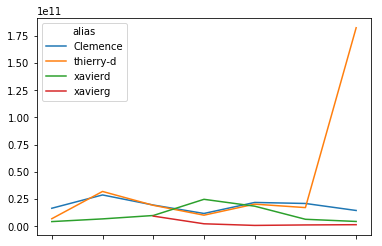

In [13]:
gr_dur.T.plot()

In [14]:
gr_question = df_question.groupby("alias").agg(aggnotnan)
gr_question

,simple_french_qcm-0-a0,simple_french_qcm-0-a1,simple_french_qcm-1-a1,simple_french_qcm-1-a2,simple_french_qcm-2-a2,simple_french_qcm-3-a0,simple_french_qcm-3-a2,simple_french_qcm-3-a3,simple_french_qcm-4-a0,simple_french_qcm-4-a2,simple_french_qcm-4-a3,simple_french_qcm-5-a0,simple_french_qcm-5-a1,simple_french_qcm-5-a2,simple_french_qcm-6-a2,simple_french_qcm-6-a3,simple_french_qcm-6-a5,simple_french_qcm-7-a0,simple_french_qcm-7-a2
alias,,,,,,,,,,,,,,,,,,,
Clemence,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
thierry-d,1.0,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0
xavierd,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0
xavierg,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
gr_bouton = df_bouton.groupby("alias").agg(aggnotnan)
gr_bouton

,simple_french_qcm-0-b,simple_french_qcm-1-b,simple_french_qcm-2-b,simple_french_qcm-3-b,simple_french_qcm-4-b,simple_french_qcm-5-b,simple_french_qcm-6-b,simple_french_qcm-7-b,simple_french_qcm-8-b
alias,,,,,,,,,
Clemence,1,1.0,1.0,1,1,1,1,1,1
thierry-d,1,1001.0,1.0,1,1,1,1,1,1
xavierd,1,1.0,1.0,1,1,1,1,1,1
xavierg,1,NaN,NaN,1000,2,1000,1,1,1


In [16]:
gr_visit = df_visit.groupby("alias").agg(aggnotnan)
gr_visit

,simple_french_qcm-0-nbvisit,simple_french_qcm-1-nbvisit,simple_french_qcm-2-nbvisit,simple_french_qcm-3-nbvisit,simple_french_qcm-4-nbvisit,simple_french_qcm-5-nbvisit,simple_french_qcm-6-nbvisit,simple_french_qcm-7-nbvisit,simple_french_qcm-8-nbvisit
alias,,,,,,,,,
Clemence,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
thierry-d,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
xavierd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
xavierg,1.0,NaN,NaN,3.0,5.0,2.0,1.0,1.0,1.0
